In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LoanPrediction.csv')

In [3]:
#Gender – Пол бинарная переменная мужской или женский;

#Married – Семейное положение бинарная переменная в браке или нет;

#Dependents – Количество детей;

#Education – Наличие высшего образования бинарная переменная есть или нет;

#Self_Employed – Вид занятости бинарная переменная самозанятый или нет;

#Applicantlncome – Доход заемщика;

#Coapplicantlncome – Доход супруга клиента;

#Loan_Amount – Сумма займа;

#Loan_Amount_Term – Срок займа;

#Credit_History – Кредитная история бинарная переменная удовлетворяет или нет;

#Property_Area – Область проживания номинативная переменная город, посёлок или деревня

#Loan_Status – Статус заёмщика


In [4]:
data.loc[data['Gender']=='Male' , 'gender_code'] = 0
data.loc[data['Gender']=='Female' , 'gender_code'] = 1 
#
data.loc[data['Married']=='No' , 'married_code'] = 0
data.loc[data['Married']=='Yes' , 'married_code'] = 1 
#
data.loc[data['Education']=='Not Graduate' , 'Education_code'] = 0
data.loc[data['Education']=='Graduate' , 'Education_code'] = 1 
#
data.loc[data['Self_Employed']=='No' , 'Self_Employed_code'] = 0
data.loc[data['Self_Employed']=='Yes' , 'Self_Employed_code'] = 1 
#
data.loc[data['Property_Area']=='Semiurban' , 'Property_Area_code'] = 0
data.loc[data['Property_Area']=='Rural' , 'Property_Area_code'] = 1 
data.loc[data['Property_Area']=='Urban' , 'Property_Area_code'] = 2
#
data.loc[data['Loan_Status']=='N' , 'Loan_Status_code'] = 0
data.loc[data['Loan_Status']=='Y' , 'Loan_Status_code'] = 1

In [5]:
data = data.drop(['Gender'] , axis=1)
data = data.drop(['Married'] , axis=1)
data = data.drop(['Education'] , axis=1)
data = data.drop(['Self_Employed'] , axis=1)
data = data.drop(['Property_Area'] , axis=1)
data = data.drop(['Loan_Status'] , axis=1)
data = data.drop(['Loan_ID'] , axis=1)

In [6]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,gender_code,married_code,Education_code,Self_Employed_code,Property_Area_code,Loan_Status_code
0,0,5849,0.0,NaN,360.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,3000,0.0,66.0,360.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
4,0,6000,0.0,141.0,360.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0


In [7]:
data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [8]:
data['Dependents'] = data['Dependents'].replace('3+', 3)
data['Dependents'] = data['Dependents'].astype(float)
data['Dependents'].fillna(np.mean(data['Dependents']), inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Dependents          614 non-null    float64
 1   ApplicantIncome     614 non-null    int64  
 2   CoapplicantIncome   614 non-null    float64
 3   LoanAmount          592 non-null    float64
 4   Loan_Amount_Term    600 non-null    float64
 5   Credit_History      564 non-null    float64
 6   gender_code         601 non-null    float64
 7   married_code        611 non-null    float64
 8   Education_code      614 non-null    float64
 9   Self_Employed_code  582 non-null    float64
 10  Property_Area_code  614 non-null    float64
 11  Loan_Status_code    614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


In [10]:
data.isnull().sum()

Dependents             0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
gender_code           13
married_code           3
Education_code         0
Self_Employed_code    32
Property_Area_code     0
Loan_Status_code       0
dtype: int64

In [11]:
data.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'gender_code', 'married_code',
       'Education_code', 'Self_Employed_code', 'Property_Area_code',
       'Loan_Status_code'],
      dtype='object')

In [12]:
data['LoanAmount'].fillna(np.mean(data['LoanAmount']), inplace=True)
data['Loan_Amount_Term'].fillna(np.mean(data['Loan_Amount_Term']), inplace=True)
data['Credit_History'].fillna(np.mean(data['Credit_History']), inplace=True)
data['gender_code'].fillna(np.mean(data['gender_code']), inplace=True)
data['married_code'].fillna(np.mean(data['married_code']), inplace=True)
data['Self_Employed_code'].fillna(np.mean(data['Self_Employed_code']), inplace=True)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
X = data.drop(['Loan_Status_code'] , axis = 1 )
y = data['Loan_Status_code']

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2311)

In [16]:
logreg = LogisticRegression(max_iter=101)
logreg.fit(X_train , y_train)

LogisticRegression(max_iter=101)

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.9186991869918699

In [19]:
metrics.roc_auc_score(y_test , y_pred)

0.8275862068965517

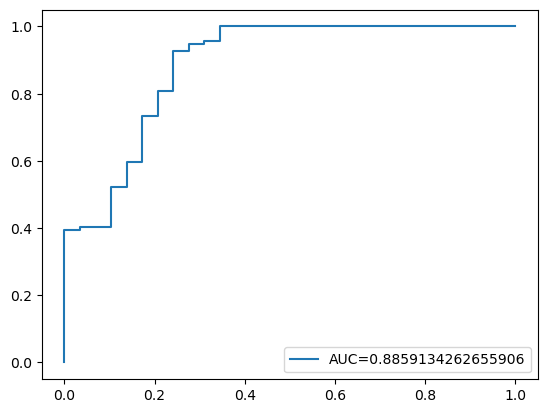

In [20]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

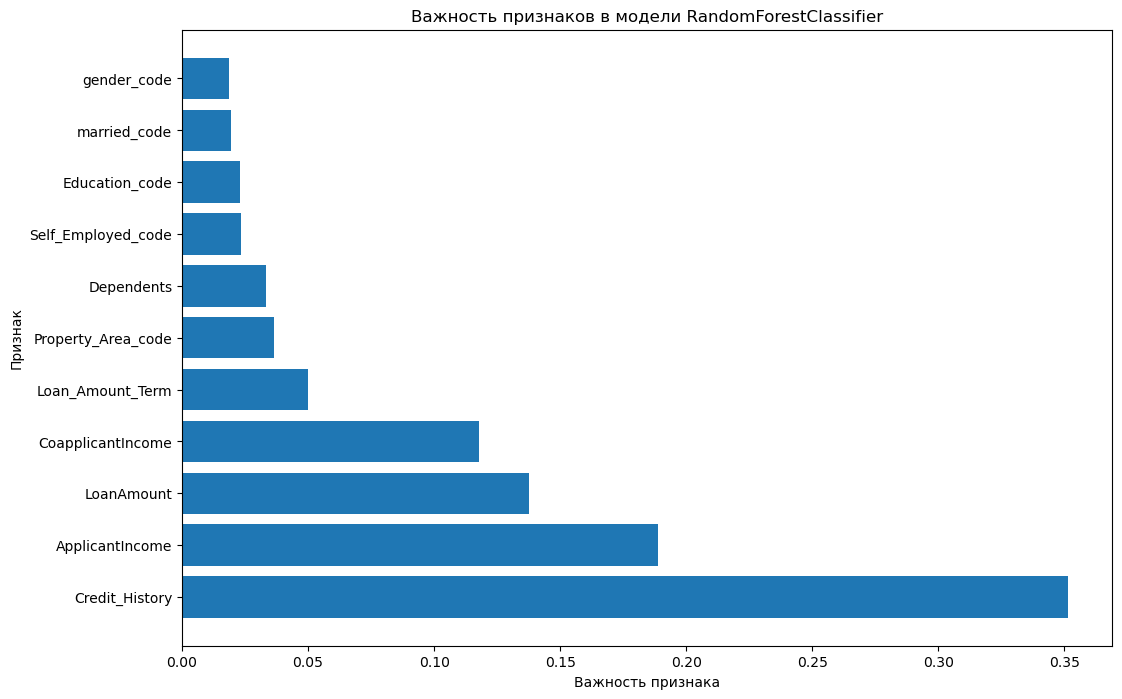

In [26]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели RandomForestClassifier')
plt.show()

In [27]:
import pickle

In [28]:
pickle_out = open("credit_scoring_using_logistic_regression.pkl" , "wb")

In [29]:
pickle.dump(logreg , pickle_out)

In [30]:
pickle_out.close()